In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import cv2
from PIL import Image
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [5]:
#loading MNIST dataset
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [6]:
type(X_train)

numpy.ndarray

In [7]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


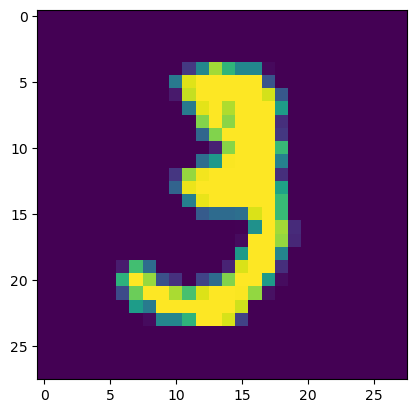

In [8]:
plt.imshow(X_train[10])

In [10]:
print(X_train[10].shape)

(28, 28)


In [11]:
print(Y_train[10])

3


In [12]:
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [13]:
#we can use these directly or use one hot encoding
#to reduce the complexity of the computations, we downscale to 0 to 1 
X_train=X_train/255
X_test=X_test/255

#### Building neural network

In [28]:
# setting up the layers of the Neural  Network
from tensorflow import keras
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

In [29]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [30]:
history=model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3012 - accuracy: 0.9126
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1358 - accuracy: 0.9592
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1006 - accuracy: 0.9696
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0814 - accuracy: 0.9751
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0685 - accuracy: 0.9785
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0570 - accuracy: 0.9817
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0509 - accuracy: 0.9834
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0446 - accuracy: 0.9860
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0385 - accuracy: 0.9876
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.033

In [31]:
loss,accuracy=model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1097 - accuracy: 0.9702


In [32]:
print(accuracy)

0.9702000021934509


In [33]:
print(X_test.shape)

(10000, 28, 28)


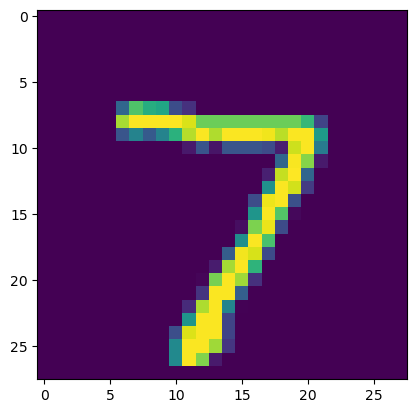

In [34]:
plt.imshow(X_test[0])

In [35]:
print(Y_test[0])

7


In [36]:
Y_pred=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [37]:
#gives in predicition probabilities to class labels
print(Y_pred[0])

[7.5415657e-05 7.8904390e-02 7.0926273e-01 8.9437336e-01 5.4683114e-05
 2.3331231e-02 1.0515104e-12 9.9999952e-01 2.3857257e-03 3.2152715e-01]


In [38]:
label_first_test_image=np.argmax(Y_pred[0])
print(label_first_test_image)

7


In [39]:
Y_pred_labels=[np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 3, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [40]:
conf_mat=confusion_matrix(Y_test,Y_pred_labels)

In [41]:
print(conf_mat)

tf.Tensor(
[[ 960    0    1    0    3    2    7    2    3    2]
 [   0 1122    3    2    0    1    3    0    4    0]
 [   1    1 1001    8    4    0    1    5   11    0]
 [   0    0    8  994    0    1    0    5    1    1]
 [   0    1    8    0  963    1    1    0    2    6]
 [   2    0    1   26    0  855    4    0    2    2]
 [   4    2    3    1   12   10  924    0    2    0]
 [   0    5   15    7    1    1    0  990    3    6]
 [   1    0    6   14    5   13    3    6  923    3]
 [   2    3    1    7   18    3    0    5    3  967]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

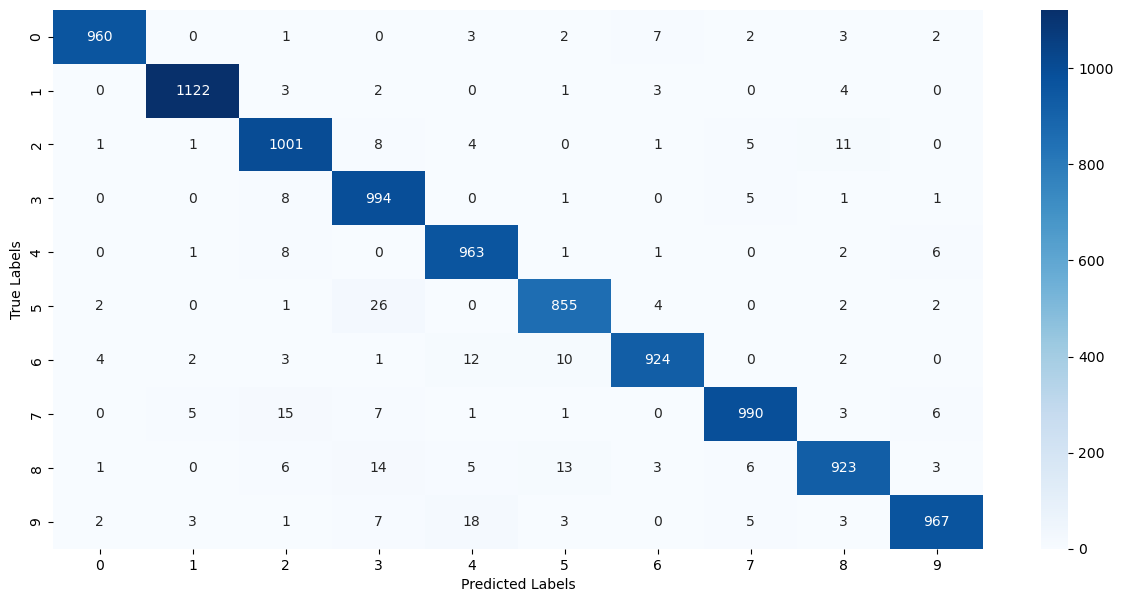

In [42]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [43]:
input_image=cv2.imread('test.png')

In [44]:
type(input_image)

numpy.ndarray

In [45]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


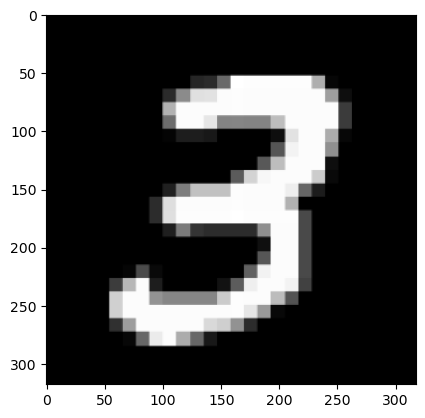

In [46]:
plt.imshow(input_image)

In [47]:
input_image.shape

(318, 318, 3)

In [48]:
grayscaled=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [49]:
grayscaled.shape

(318, 318)

In [50]:
test=cv2.resize(grayscaled,(28,28))

In [51]:
test.shape

(28, 28)

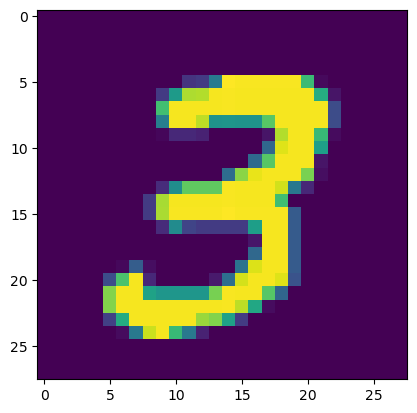

In [52]:
plt.imshow(test)

In [53]:
test=test/255

In [54]:
test_reshaped=np.reshape(test,[1,28,28])

In [55]:
test_pred=model.predict(test_reshaped)
print(test_pred)

1/1 [==============================] - 0s 27ms/step
[[3.3089049e-11 9.0364165e-07 2.9985649e-06 1.0000000e+00 1.8180995e-11
  9.9893028e-01 7.9406734e-16 1.0358173e-03 7.5448430e-01 6.7512059e-01]]


In [56]:
test_pred_label=np.argmax(test_pred)

In [57]:
print(test_pred_label)

3


In [58]:
#saving the model to use it later
model.save('mnist_cnn.h5')
print('Model saved!')

Model saved!


C:\Users\Nishchala\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [59]:
#importing model
model = keras.models.load_model("mnist_cnn.h5")

Path of test image:test.png
1/1 [==============================] - 0s 110ms/step
The Handwritten Digit is recognised as  3


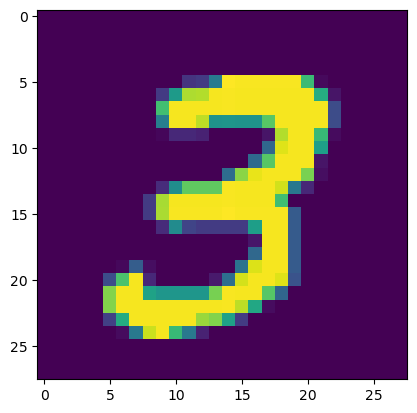

In [60]:
path=input('Path of test image:')
test_image=cv2.imread(path)
plt.imshow(test)
grayscale=cv2.cvtColor(test_image,cv2.COLOR_RGB2GRAY)
test_image_resize=cv2.resize(grayscale,(28,28))
test_image_resize=test_image_resize/255
test_reshaped=np.reshape(test_image_resize,[1,28,28])
pred=model.predict(test_reshaped)
pred_label=np.argmax(pred)
print('The Handwritten Digit is recognised as ',pred_label)